In [1]:
#Setup paths and imports
import sys
sys.path.insert(0,'/content/WASP-CBSS-BT')
from IPython.display import Image
import simulation.notebook_interface as notebook_interface
import simulation.behavior_tree as behavior_tree
behavior_tree.load_settings_from_file('simulation/tests/BT_TEST_SETTINGS.yaml')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pathlib import Path

In [1]:
import os
import sys
import fileinput
import csv

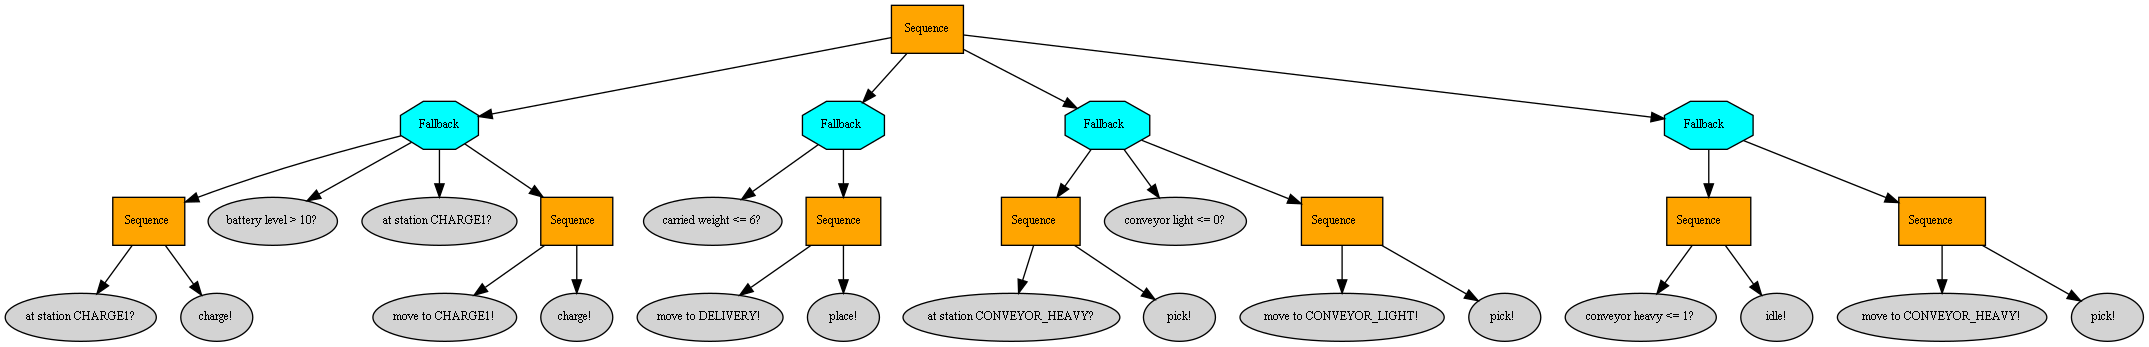

In [3]:
individual =       ['s(',
                  'f(','s(', 'at station CHARGE1?', 'charge!',')',
                  'battery level > 10?', 'at station CHARGE1?', 's(', 'move to CHARGE1!', 'charge!',')',')',
              
                  'f(', 'carried weight <= 6?', 's(', 'move to DELIVERY!','place!',')',')',
              
                  'f(','s(', 'at station CONVEYOR_HEAVY?', 'pick!',')',
                  'conveyor light <= 0?', 's(','move to CONVEYOR_LIGHT!','pick!',')',')',
              
                  'f(', 's(', 'conveyor heavy <= 1?', 'idle!',')',  's(','move to CONVEYOR_HEAVY!','pick!',')',
              ')']
environment = notebook_interface.Environment(seed=1, verbose=False)
environment.plot_individual('', 'behavior_tree', individual)

Image('behavior_tree.png') 

In [4]:
# Create and save executed traces
for i in range (0, 100):
    environment = notebook_interface.Environment(seed=i, verbose=False)
    result = environment.get_fitness(individual, max_ticks=200, show_world=True, seed=environment.seed)
    print("Fitness:", result)

seed 0
Fitness: (38.0, 8, 22)
seed 1
Fitness: (45.0, 11, 23)
seed 2
Fitness: (39.0, 12, 15)
seed 3
Fitness: (43.0, 10, 23)
seed 4
Fitness: (45.0, 10, 25)
seed 5
Fitness: (46.0, 16, 14)
seed 6
Fitness: (39.0, 8, 23)
seed 7
Fitness: (44.0, 14, 16)
seed 8
Fitness: (26.0, 4, 18)
seed 9
Fitness: (54.0, 14, 26)
seed 10
Fitness: (40.0, 7, 26)
seed 11
Fitness: (35.0, 8, 19)
seed 12
Fitness: (42.0, 14, 14)
seed 13
Fitness: (44.0, 15, 14)
seed 14
Fitness: (33.0, 7, 19)
seed 15
Fitness: (32.0, 7, 18)
seed 16
Fitness: (45.0, 10, 25)
seed 17
Fitness: (41.0, 13, 15)
seed 18
Fitness: (34.0, 7, 20)
seed 19
Fitness: (41.0, 10, 21)
seed 20
Fitness: (43.0, 11, 21)
seed 21
Fitness: (42.0, 10, 22)
seed 22
Fitness: (42.0, 10, 22)
seed 23
Fitness: (36.0, 7, 22)
seed 24
Fitness: (30.0, 7, 16)
seed 25
Fitness: (47.0, 14, 19)
seed 26
Fitness: (45.5, 8, 33)
seed 27
Fitness: (39.0, 7, 25)
seed 28
Fitness: (37.0, 9, 19)
seed 29
Fitness: (43.0, 15, 13)
seed 30
Fitness: (40.0, 10, 20)
seed 31
Fitness: (39.0, 11, 17)

In [2]:
def get_station_from_position(x=0, y=0):
    """
    Returns pose of given station
    """
    #if x == 2 and y == 7.5:
    #    return "CHARGE2"
    if x == 23 and y == 12:
        return "CHARGE1"
    if x == 12 and y == 12:
        return "CONVEYOR_HEAVY"
    if x == 12 and y == 3:
        return "CONVEYOR_LIGHT"
    if x == 21 and y == 7.5:
        return "DELIVERY"
    return "OTHER"

In [5]:
n_traces=100
file_name = "ExecutedTraces.csv"   
executed_traces_file= open(file_name,"w")
executed_traces_file.write("at station,battery level,carried weight,carried light,carried heavy,conveyor light,conveyor heavy,Decision\n") 
executed_traces_file.close()
for i in range (0, n_traces):
    print(i)
    input_file = "executed_traces/robots_" + str(i) +".txt"

    executed_traces_file= open(file_name,"a")
    new_line=""
    for line in fileinput.input(input_file ):
        if 'WorldState(' in line:
            variables = line.split(",")
            x=float(variables[1].split("=")[2])
            y=float(variables[2].split("=")[1].replace(")", ""))
            current_state = get_station_from_position(x,y) + "," + variables[3].replace('battery_level=', '') + variables[4].replace(' carried_weight=', ',') + variables[5].replace(' carried_light=', ',') + variables[6].replace(' carried_heavy=', ',') + variables[7].replace(' cnv_n_light=', ',') + variables[8].replace(' cnv_n_heavy=', ',')
        if '!'in line:
            current_act = line.replace('\n', '') 
            executed_traces_file.write(current_state + "," + current_act + "\n")
            new_line=""
    fileinput.close()
    executed_traces_file.close()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
